<a href="https://colab.research.google.com/github/Tahi11/test/blob/master/Copy_of_crossfoldlaptop2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving RE_dataset.csv to RE_dataset.csv


In [ ]:
#SPACY
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk import PorterStemmer

from imblearn.over_sampling import SMOTE #for SMOTE
from collections import Counter #for count
import matplotlib.pyplot as plt #for plot
import pandas as pd #to read data
#from nltk.tokenize import word_tokenize
#from nltk.corpus import stopwords
#from nltk import PorterStemmer
from sklearn.preprocessing import LabelEncoder #for encoding
from sklearn import model_selection, feature_extraction, naive_bayes, pipeline, metrics
## Tf-Idf
#vectorizer = feature_extraction.text.TfidfVectorizer(max_features=5000, ngram_range=(1,2))

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier

from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('RE_dataset.csv')
df.head(10)

,date,id,no.Comments,score,upvote ratio,ups,downs,title,selftext,tag,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,...,Unnamed: 187,Unnamed: 188,Unnamed: 189,Unnamed: 190,Unnamed: 191,Unnamed: 192,Unnamed: 193,Unnamed: 194,Unnamed: 195,Unnamed: 196,Unnamed: 197,Unnamed: 198,Unnamed: 199,Unnamed: 200,Unnamed: 201,Unnamed: 202,Unnamed: 203,Unnamed: 204,Unnamed: 205,Unnamed: 206,Unnamed: 207,Unnamed: 208,Unnamed: 209,Unnamed: 210,Unnamed: 211,Unnamed: 212,Unnamed: 213,Unnamed: 214,Unnamed: 215,Unnamed: 216,Unnamed: 217,Unnamed: 218,Unnamed: 219,Unnamed: 220,Unnamed: 221,Unnamed: 222,Unnamed: 223,Unnamed: 224,Unnamed: 225,Unnamed: 226
0,2019-08-28 14:14:32,cwle38,48,637,0.98,637,0,"For anyone who's ever edited a video ever, enjoy.",NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2019-07-03 19:02:44,c8s3x2,15,448,0.97,448,0,Media Offline,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-01-06 15:30:11,ekvldh,51,424,0.96,424,0,Adobe Premiere youtuber starterpack.,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-03-27 14:29:08,fpxv8h,24,360,0.94,360,0,Just me?,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-02-26 18:00:17,f9x942,60,300,0.98,300,0,Monster of a weekly project done 😅,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2019-05-22 18:02:51,brrzvd,32,298,0.98,298,0,"Every time I open Premiere, I see a pair of un...",NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2019-12-09 17:26:43,e8cz4r,28,259,0.98,259,0,Created this Stop motion animation recently. T...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2020-02-12 19:50:59,f2wx21,22,253,0.96,253,0,I think we all know what the real Premiere is,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2019-12-23 10:27:11,eeixq6,18,239,1.00,239,0,[Tutorial

In [ ]:
col = ['title', 'selftext', 'tag']
df= df[col]
cat_id_df = df[["title", "selftext","tag"]]
df["tag"]=df["tag"].replace({0:"Others",1:"Bug Report",2:"Feature Related"})

In [ ]:
#Convesrion into lower case
df['title']= df['title'].str.lower()
df['selftext']= df['selftext'].str.lower()

import nltk
nltk.download('stopwords')
# removal of puntucation
df['selftext'] = df.selftext.str.replace('[^\w\s]', '')
df['title'] = df.title.str.replace('[^\w\s]', '')

#stop words removal
stop = stopwords.words('english')
df['title'] = df['title'].fillna("").apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
df['selftext']=df['selftext'].fillna("") # filling NAN to ""
df['selftext'] = df['selftext'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
import re
df['title'] = df['title'].str.replace('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', ' ')
df['selftext'] = df['selftext'].str.replace('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', ' ')
#stemming
stemmer = PorterStemmer()
df['title'] = df['title'].apply(lambda row: ' '.join([stemmer.stem(word) for word in row.split()])) 
df['selftext'] = df['selftext'].apply(lambda row: ' '.join([stemmer.stem(word) for word in row.split()]))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
df['tag'].value_counts()

Others             891
Feature Related    666
Bug Report         357
Name: tag, dtype: int64

In [ ]:
df['title']= df['title']+ df['selftext']

In [ ]:
#tfidf
#remove number in preprocessing
from sklearn.feature_extraction.text import CountVectorizer,TfidfTransformer, TfidfVectorizer

#tf-idf
tfidf_vectorizer = TfidfVectorizer(token_pattern=r'(?u)\b[A-Za-z]+\b', ngram_range=(1,3))#token_pattern=r'(?u)\b[A-Za-z]+\b', ngram_range=(1, 6)
data_tfidf = tfidf_vectorizer.fit_transform(list(df['title']))
print(data_tfidf.shape)
print(len(tfidf_vectorizer.get_feature_names()))
print(tfidf_vectorizer.get_feature_names())




(1914, 17241)
17241
['aaaaaaaaaaahaaaaaaa', 'abbrevi', 'abbrevi eg', 'abbrevi eg excel', 'abc', 'abc cb', 'abc cb workflow', 'abl', 'abl increas', 'abl increas call', 'abl modifi', 'abl modifi css', 'abl oper', 'abl oper excel', 'abl post', 'abl post tomorrow', 'abl put', 'abl put channel', 'abl reach', 'abl reach phone', 'abl retriev', 'abl retriev someday', 'abl separ', 'abl separ fav', 'abl turn', 'abl turn manual', 'abl unlock', 'abl unlock fingerprint', 'abl use', 'abl use airpod', 'abl verifi', 'abl verifi phone', 'absolut', 'absolut formula', 'absolut formula valu', 'absuptli', 'absuptli get', 'absuptli get cut', 'abus', 'abus excel', 'abus excel instead', 'accept', 'accept rexcel', 'accept slack', 'accept slack emoji', 'access', 'access databas', 'access download', 'access download whatsapp', 'access mobil', 'access mobil phone', 'access permiss', 'accid', 'accid purpos', 'accident', 'accident dd', 'accident dd somehow', 'accident delet', 'accident delet audio', 'accident press

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Class=2, n=891 (33.333%)
Class=0, n=891 (33.333%)
Class=1, n=891 (33.333%)


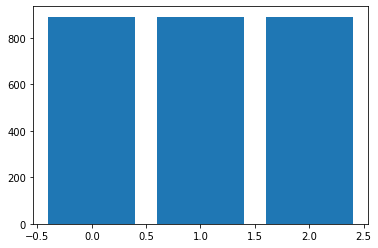

In [ ]:
from imblearn.over_sampling import SMOTE
X = data_tfidf.toarray()
y = df["tag"].values
y=LabelEncoder().fit_transform(y)
X=X
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

#3. Plot to check whether classes are balanced or not (Note: can use barplot directly to get the same result)
counter = Counter(y)
for k,v in counter.items():
	per = v / len(y) * 100
	print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
plt.bar(counter.keys(), counter.values())
plt.show()

In [ ]:
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
from sklearn.pipeline import make_pipeline
from sklearn.feature_extraction.text import CountVectorizer,TfidfTransformer, TfidfVectorizer
from sklearn.svm import SVC
from sklearn import svm
from sklearn.model_selection import cross_val_score
from statistics import mean
from sklearn.metrics import SCORERS
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
from imblearn.over_sampling import SMOTE #for SMOTE
from collections import Counter #for count
from sklearn.model_selection import StratifiedKFold, KFold


scoring = {'accuracy' : make_scorer(accuracy_score), 
           'precision' : make_scorer(precision_score , average = 'micro'),
           'recall' : make_scorer(recall_score , average = 'micro'), 
           'f1_score' : make_scorer(f1_score , average = 'micro')}

kfold = model_selection.KFold(n_splits=10)
clf= make_pipeline( svm.SVC(kernel='sigmoid'))

results = model_selection.cross_validate(clf, X, y, scoring= scoring , cv=kfold)


In [1]:
print(results)


NameError: ignored

In [ ]:
print('Accuracy micro SVM kfold', (mean(results['test_accuracy'])))
print('Recall', mean(results['test_recall']))
print('f1score', mean(results['test_f1_score']))
print('precision', mean(results['test_accuracy']))

Accuracy micro SVM kfold 0.8317317904857734
Recall 0.8317317904857734
f1score 0.8317317904857734
precision 0.8317317904857734


In [ ]:
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
from sklearn.pipeline import make_pipeline
from sklearn.feature_extraction.text import CountVectorizer,TfidfTransformer, TfidfVectorizer
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from statistics import mean
from sklearn.metrics import SCORERS
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
from imblearn.over_sampling import SMOTE #for SMOTE
from collections import Counter #for count
from sklearn.model_selection import StratifiedKFold, KFold


scoring = {'accuracy' : make_scorer(accuracy_score), 
           'precision' : make_scorer(precision_score , average = 'micro'),
           'recall' : make_scorer(recall_score , average = 'micro'), 
           'f1_score' : make_scorer(f1_score , average = 'micro')}

kfold = model_selection.KFold(n_splits=10)
clf= make_pipeline(GaussianNB())

results_NB = model_selection.cross_validate(clf, X, y, scoring= scoring , cv=kfold)

In [ ]:
results_NB

{'fit_time': array([2.62958002, 2.60889077, 2.62192583, 2.66224647, 2.66268444,
        2.64241791, 2.59198308, 2.60791302, 2.60878301, 2.56706691]),
 'score_time': array([0.3423326 , 0.34109616, 0.34215164, 0.33874822, 0.33930349,
        0.33834529, 0.34090614, 0.33773017, 0.3356719 , 0.34064555]),
 'test_accuracy': array([0.54104478, 0.64552239, 0.54850746, 0.71161049, 0.6741573 ,
        0.72284644, 0.75655431, 0.9588015 , 1.        , 1.        ]),
 'test_f1_score': array([0.54104478, 0.64552239, 0.54850746, 0.71161049, 0.6741573 ,
        0.72284644, 0.75655431, 0.9588015 , 1.        , 1.        ]),
 'test_precision': array([0.54104478, 0.64552239, 0.54850746, 0.71161049, 0.6741573 ,
        0.72284644, 0.75655431, 0.9588015 , 1.        , 1.        ]),
 'test_recall': array([0.54104478, 0.64552239, 0.54850746, 0.71161049, 0.6741573 ,
        0.72284644, 0.75655431, 0.9588015 , 1.        , 1.        ])}

In [ ]:
print('Accuracy micro SVM kfold', (mean(results_NB['test_accuracy'])))
print('Recall', mean(results_NB['test_recall']))
print('f1score', mean(results_NB['test_f1_score']))
print('precision', mean(results_NB['test_accuracy']))

Accuracy micro SVM kfold 0.7559044664318855
Recall 0.7559044664318855
f1score 0.7559044664318855
precision 0.7559044664318855


In [ ]:
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
from sklearn.pipeline import make_pipeline
from sklearn.feature_extraction.text import CountVectorizer,TfidfTransformer, TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import cross_val_score
from statistics import mean
from sklearn.metrics import SCORERS
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
from imblearn.over_sampling import SMOTE #for SMOTE
from collections import Counter #for count
from sklearn.model_selection import StratifiedKFold, KFold


scoring = {'accuracy' : make_scorer(accuracy_score), 
           'precision' : make_scorer(precision_score , average = 'micro'),
           'recall' : make_scorer(recall_score , average = 'micro'), 
           'f1_score' : make_scorer(f1_score , average = 'micro')}

kfold = model_selection.KFold(n_splits=10)
classy= RandomForestClassifier(n_estimators=1000, random_state=0)
clf= make_pipeline(classy)

results_RF = model_selection.cross_validate(clf, X, y, scoring= scoring , cv=kfold)

In [ ]:
print(results_RF)

{'fit_time': array([302.48048353, 343.37012625, 224.51581645, 224.98546124,
       214.38599491, 215.29458714, 216.09895396, 240.7804358 ,
       248.16030407, 239.65092802]), 'score_time': array([0.6096108 , 0.61317325, 0.52740359, 0.51019931, 0.52390766,
       0.4866209 , 0.52886033, 0.37743473, 0.35282254, 0.41488266]), 'test_accuracy': array([0.71641791, 0.73134328, 0.68283582, 0.6928839 , 0.7340824 ,
       0.76029963, 0.59550562, 0.91385768, 0.99250936, 0.97003745]), 'test_precision': array([0.71641791, 0.73134328, 0.68283582, 0.6928839 , 0.7340824 ,
       0.76029963, 0.59550562, 0.91385768, 0.99250936, 0.97003745]), 'test_recall': array([0.71641791, 0.73134328, 0.68283582, 0.6928839 , 0.7340824 ,
       0.76029963, 0.59550562, 0.91385768, 0.99250936, 0.97003745]), 'test_f1_score': array([0.71641791, 0.73134328, 0.68283582, 0.6928839 , 0.7340824 ,
       0.76029963, 0.59550562, 0.91385768, 0.99250936, 0.97003745])}


In [ ]:
print('RandomForest Accuracy', mean(results_RF['test_accuracy']))
print('Recall',mean(results_RF['test_recall']))
print('Precision',mean(results_RF['test_precision']))
print('F1score',mean(results_RF['test_f1_score']))

RandomForest Accuracy 0.778977304488792
Recall 0.778977304488792
Precision 0.778977304488792
F1score 0.778977304488792


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfTransformer, TfidfVectorizer
from sklearn.svm import SVC
from sklearn import svm
from sklearn.model_selection import cross_val_score
from statistics import mean
from sklearn.metrics import SCORERS
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
from imblearn.over_sampling import SMOTE #for SMOTE
from collections import Counter #for count
from sklearn.model_selection import StratifiedKFold
# X = df["title"]
# y = df["tag"].values
# y=LabelEncoder().fit_transform(y)


from sklearn.pipeline import make_pipeline
clf = make_pipeline( svm.SVC(kernel='sigmoid'))

scoring = {'F1_Score' : make_scorer(f1_score, average='macro')}
k_fold = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)




scores = model_selection.cross_validate (clf, X, y, scoring= scoring , cv=k_fold)
print(scores) 


/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


NameError: ignored

In [ ]:
import math
math. mean([0.84681786, 0.84572792, 0.83106648, 0.85961106, 0.83038005,0.84971306, 0.83127191, 0.84037819, 0.83039106, 0.88010299])

NameError: ignored